# CHT2/23/DSA/0107

# ALHERI YUSUF MIDALA

# Natural Language Processing Project

Welcome to the NLP Project for this section of the course. In this NLP project you will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. 
We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

Let's get started! Just follow the directions below!

## Imports
 **Import the usual suspects. :) **

In [1]:
import pandas as pd
import nltk
import string

## The Data

**Read the yelp.csv file and set it as a dataframe called yelp.**

In [3]:
df= pd.read_csv('yelp.csv')

** Check the head, info , and describe methods on yelp.**

In [4]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [6]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Create a new column called "text length" which is the number of words in the text column.**

In [18]:
def count_words(text):
    words = text.split() 
    return len(words) 
df['text length'] = df['text'].apply(lambda x: count_words(x))

In [19]:
df.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny', 'text length'],
      dtype='object')

# EDA

Let's explore the data

## Imports

**Import the data visualization libraries if you haven't done so already.**

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings. Reference the seaborn documentation for hints on this**

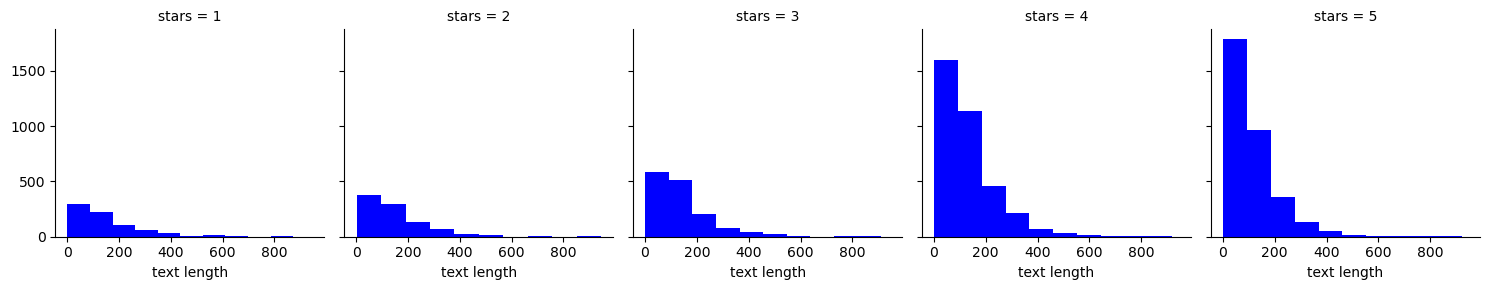

In [20]:
g = sns.FacetGrid(df, col='stars', margin_titles=True)
g.map(plt.hist, 'text length', bins=10, color='blue')

**Create a boxplot of text length for each star category.**

Text(0.5, 1.0, 'Boxplot of Text Length by Star Rating')

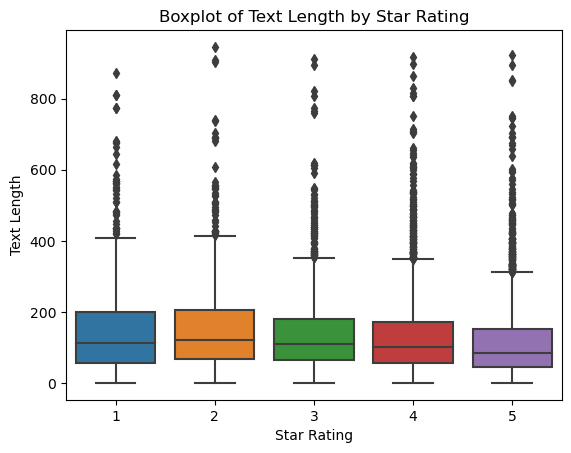

In [24]:
sns.boxplot(x='stars', y='text length', data=df)
plt.xlabel('Star Rating')
plt.ylabel('Text Length')
plt.title('Boxplot of Text Length by Star Rating')

**Create a countplot of the number of occurrences for each type of star rating.**

Text(0.5, 1.0, 'Countplot of Star Ratings')

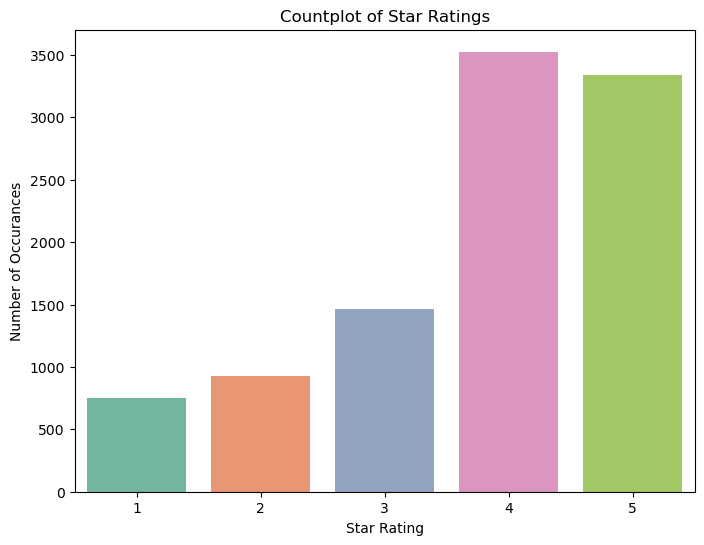

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x='stars', data=df, palette='Set2')
plt.xlabel('Star Rating')
plt.ylabel('Number of Occurances')
plt.title('Countplot of Star Ratings')

** Use groupby to get the mean values of the numerical columns, you should be able to create this dataframe with the operation:**

In [28]:
means_df = df.groupby('stars').mean().reset_index()
print(means_df)

   stars      cool    useful     funny  text length
0      1  0.576769  1.604806  1.056075   153.953271
1      2  0.719525  1.563107  0.875944   156.435814
2      3  0.788501  1.306639  0.694730   140.714579
3      4  0.954623  1.395916  0.670448   131.174135
4      5  0.944261  1.381780  0.608631   114.463590


C:\Users\yusuf\AppData\Local\Temp\ipykernel_3108\3656435785.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means_df = df.groupby('stars').mean().reset_index()


**Use the corr() method on that groupby dataframe to produce this dataframe:**

In [36]:
corr_matrix = means_df.corr()
print(corr_matrix)

                stars      cool    useful     funny  text length
stars        1.000000  0.964758 -0.761288 -0.950389    -0.954286
cool         0.964758  1.000000 -0.743329 -0.944939    -0.865362
useful      -0.761288 -0.743329  1.000000  0.894506     0.697506
funny       -0.950389 -0.944939  0.894506  1.000000     0.847204
text length -0.954286 -0.865362  0.697506  0.847204     1.000000


**Then use seaborn to create a heatmap based off that .corr() dataframe:**

Text(0.5, 1.0, 'Correlation Heatmap')

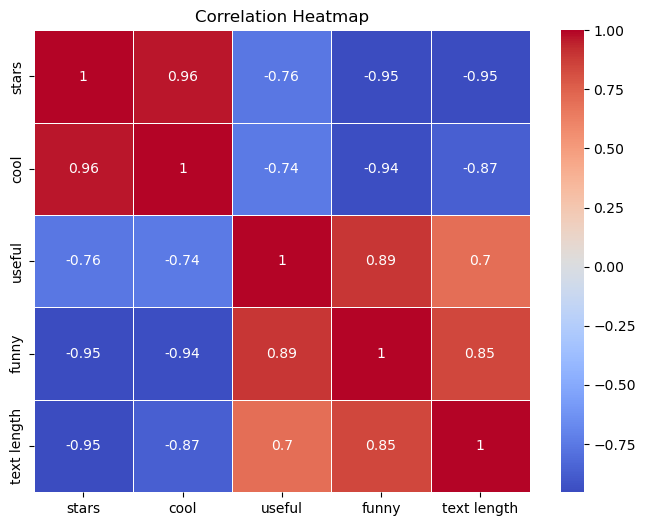

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

## NLP Classification Task

Let's move on to the actual task. To make things a little easier, go ahead and only grab reviews that were either 1 star or 5 stars.

**Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [44]:
yelp_class = df[(df['stars'] == 1) | (df['stars'] == 5)]

yelp_class.reset_index(drop=True, inplace=True)
print(yelp_class)

                 business_id        date               review_id  stars  \
0     9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1     ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2     _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
3     6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   
4     zp713qNhx8d9KCJJnrw1xA  2010-02-12  riFQ3vxNpP4rWLk_CSri2A      5   
...                      ...         ...                     ...    ...   
4081  R8VwdLyvsp9iybNqRvm94g  2011-10-03  pcEeHdAJPoFNF23es0kKWg      5   
4082  WJ5mq4EiWYAA4Vif0xDfdg  2011-12-05  EuHX-39FR7tyyG1ElvN1Jw      5   
4083  f96lWMIAUhYIYy9gOktivQ  2009-03-10  YF17z7HWlMj6aezZc-pVEw      5   
4084  L3BSpFvxcNf3T_teitgt6A  2012-03-19  0nxb1gIGFgk3WbC5zwhKZg      5   
4085  pF7uRzygyZsltbmVpjIyvw  2010-10-16  vWSmOhg2ID1MNZHaWapGbA      5   

                                                   text    type  \
0     My wife took me here on my

** Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)**

In [47]:
X = yelp_class['text']
Y = yelp_class['stars']

**Import CountVectorizer and create a CountVectorizer object.**

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
countVectorizer = CountVectorizer()

** Use the fit_transform method on the CountVectorizer object and pass in X (the 'text' column). Save this result by overwriting X.**

In [49]:
X = countVectorizer.fit_transform(X)

## Train Test Split

Let's split our data into training and testing data.

** Use train_test_split to split up the data into X_train, X_test, y_train, y_test. Use test_size=0.3 and random_state=101 **

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)


## Training a Model

Time to train a model!

** Import MultinomialNB and create an instance of the estimator and call is nb **

In [53]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

**Now fit nb using the training data.**

In [54]:
nb.fit(X_train, y_train)

MultinomialNB()

## Predictions and Evaluations

Time to see how our model did!

**Use the predict method off of nb to predict labels from X_test.**

** Create a confusion matrix and classification report using these predictions and y_test **

In [58]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = nb.predict(X_test)

confusion_mtx = confusion_matrix(y_test, y_pred)

class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(confusion_mtx)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[159  69]
 [ 22 976]]

Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



## THANK YOU